In [76]:
from math import sqrt,e, log
from matplotlib import pyplot as plt
%matplotlib inline

# Newton Raphson method: $x_1 = x_0-\frac{f(x_0)}{f'(x_0)}$

Lets look at an example **$\sqrt{n}$ (square root of n)** 

we want to find the solution to a function $\sqrt{n} = x$ 

threfore we define our function $f(x) = x^2 - n$ (because when our f(x)=0 we know that x equals the root of n)

derivative of f(x) is $ f'(x) = 2x$

therefore newton equation: $ x_1 = x_0 - \frac{{x_0}^2-n}{2x_0}$

or simplified: $ x_1 = x_0 - \frac{1}{2}(x_0-\frac{n}{x_0})$

let's try it out:


In [78]:
def newton_raphson(n,x0, num_iterations, f, target):
    results = [x0] * (1+num_iterations)
    for i in range(1,len(results)):
        results[i] = f(results[i-1],n)
    print(results)
    print(f'our solution: {results[-1]}\nactual math.sqrt: {target(n)}\ndifference between the two: {results[-1]-target(n)}')
    plt.plot(results,'r+-', np.array([target(n)]*(num_iterations+1)),'g-')
    return results[-1]

In [79]:
f = lambda x,n: x - 0.5*(x - n/x) 

In [80]:
n = 3
x = 2
num_iterations = 4

[2, 1.75, 1.7321428571428572, 1.7320508100147274, 1.7320508075688772]
our solution: 1.7320508075688772
actual math.sqrt: 1.7320508075688772
difference between the two: 0.0


1.7320508075688772

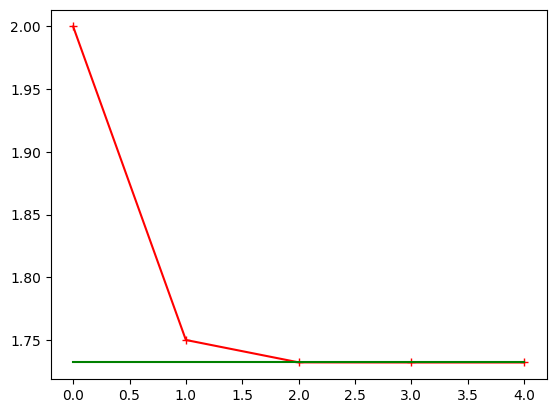

In [81]:
newton_raphson(n,x,num_iterations, f, sqrt)

## The initial guess we give is meaningful in terms of the amount of iterations

This time let's guess that $\sqrt{3} \approx 5$ (which is obviously wrong)

In [82]:
n = 3
x = 5
num_iterations = 4

[5, 2.8, 1.9357142857142855, 1.7427648919346335, 1.7320837413295722]
our solution: 1.7320837413295722
actual math.sqrt: 1.7320508075688772
difference between the two: 3.293376069501974e-05


1.7320837413295722

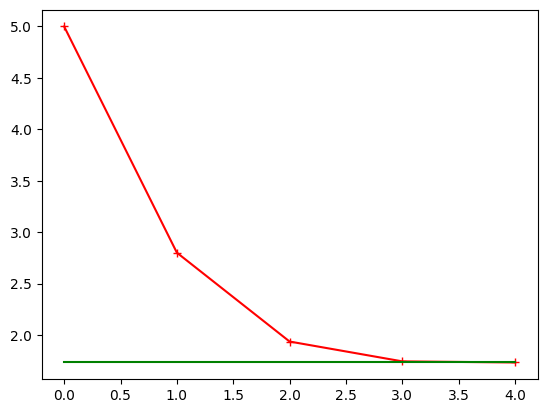

In [83]:
newton_raphson(n,x,num_iterations, f, sqrt)

### We are not quite there yet, because of a bad initial guess!

let's try more iterations

In [84]:
num_iterations = 6

[5, 2.8, 1.9357142857142855, 1.7427648919346335, 1.7320837413295722, 1.7320508078819778, 1.7320508075688772]
our solution: 1.7320508075688772
actual math.sqrt: 1.7320508075688772
difference between the two: 0.0


1.7320508075688772

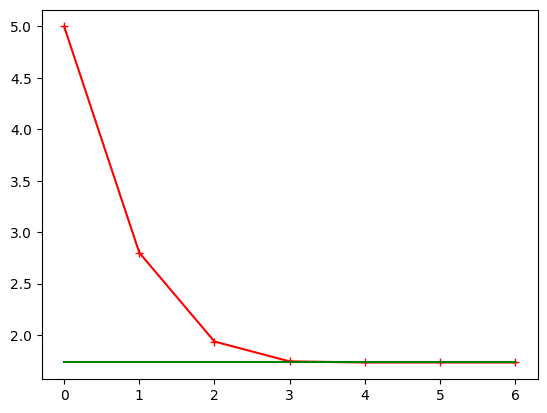

In [85]:
newton_raphson(n,x,num_iterations, f, sqrt)

### ^--- IT TOOK TWO MORE ITERATIONS !

# Let's look at a tougher function: $ln(n)$ (natural logarithm, aka $log_e(x)$)

same as before, let's figure out Newton's equation: $ln(n) = x$

means we want to look for a solution to $f(x) = n - e^x$

first derivative is: $f'(x) = -e^x$

Newton equation: $x_1 = x_0 - \frac{n - e^{x_0}}{-e^{x_0}}$

## simplified: $x_1 = x_0 - 1 + \frac{n}{e^{x_0}}$

In [86]:
f2 = lambda x,n: x - 1 + n/e**x

In [87]:
x = 2
n = 10
num_iterations = 5

[2, 2.3533528323661272, 2.3038522408526454, 2.302585895486899, 2.302585092994368, 2.302585092994046]
our solution: 2.302585092994046
actual math.sqrt: 2.302585092994046
difference between the two: 0.0


2.302585092994046

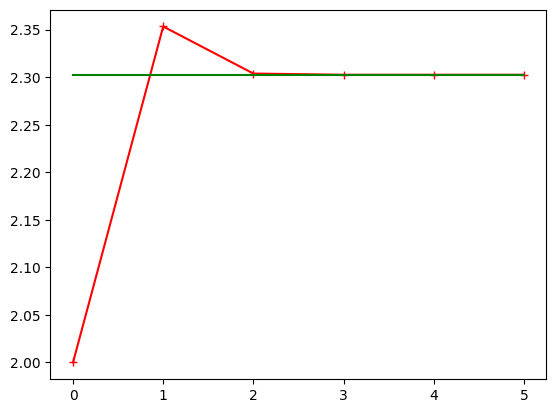

In [88]:
newton_raphson(n, x, num_iterations, f2, log)